# Cleaning

## Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Useful Functions 

In [2]:
def key_stats(df):
    
    """
    Take a dataframe and return its data types, 
    column counts, number of null values and unique values as 
    a new dataframe
    """
    
    dtypes = df.dtypes
    counts = df.count()
    nulls = df.isna().sum()
    uniques = df.apply(pd.unique)
    
    stats = [dtypes, counts, nulls, uniques]
    
    table = pd.concat(stats, axis = 1).reset_index().rename(columns={'index':'Feature', 0:'dtypes', 1:'Count', 2:'NAs', 3:'Uniques'})
    
    return table

In [3]:
def hued_countplots(colour_by):
    by_feature = list(mushies.columns)
    by_feature.remove(colour_by)
    for col in by_feature:
        ax = plt.subplot()
        sns.countplot(data = mushies, x = col, hue = colour_by)
        plt.xticks(rotation = 45)
        ax.set_xlabel(col.replace('_', ' ').title())
        plt.show()

## Import Data 

In [4]:
df = pd.read_csv('../Data/mushrooms.csv')

In [5]:
mushies = df.copy()

## Renaming columns and category labels

In [ ]:
# key_stats(mushies)

In [6]:
# COPIED FROM METADATA, WE WANT TO FORMAT THIS INTO A DICTIONARY OF 
# DICTIONARIES WHERE SUPER KEYS ARE COLUMNS AND INFRA KEYS ARE LABELS
dic = """class: edible=e, poisonous=p
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
veil-type: partial=p,universal=u
veil-color: brown=n,orange=o,white=w,yellow=y
ring-number: none=n,one=o,two=t
ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d"""

dic = dic.split('\n')

In [7]:
# REFORMATTING DIC BY CHANGING THE KEY AND VALUE AROUND AND MAKING THE DICTIONARY
mushies_dic = {}
for elem in dic:
    col_split = elem.split(':')
    label_split = col_split[1].strip().split(',')
    for lbls in label_split:
        lbls = lbls.replace('=', ':')
        mini_dic = {lbls.split('=')[1].strip(): lbls.split('=')[0].strip() for lbls in label_split}
    mushies_dic[col_split[0]] = mini_dic

In [8]:
# CHANGING THE VALUES IN THE DATA WITH THE DICTIONARY
mushies = mushies.replace(mushies_dic)

In [9]:
# CHECK WHAT PARTS OF DICTIONARY ARENT IN DATA FRAME
cols, vals = [], []
for col in mushies.columns:
    missing_col = []
    for val in mushies_dic[col].values():
        if mushies[col].str.contains(val).any():
            continue
        else: missing_col.append(val)
    if len(missing_col)!=0: cols.append(col), vals.append(missing_col)
missing = dict(zip(cols, vals))
missing

{'gill-attachment': ['descending', 'notched'],
 'gill-spacing': ['distant'],
 'stalk-root': ['cup', 'rhizomorphs'],
 'veil-type': ['universal'],
 'ring-type': ['cobwebby', 'sheathing', 'zone']}

In [10]:
# CHANGING DF COLNAMES TO HAVE UNDERSCORE INSTEAD OF DASH
old_cnames = mushies.columns
new_cnames = [name.replace('-', '_') for name in old_cnames]
mushies.rename(columns = dict(zip(old_cnames,new_cnames)), inplace = True)

In [11]:
# MISSING DATA IS RECLASSED AS NaN
mushies['stalk_root'].replace('missing', np.nan, inplace = True)

In [12]:
key_stats(mushies)

,Feature,dtypes,Count,NAs,Uniques
0,class,object,8124,0,"[poisonous, edible]"
1,cap_shape,object,8124,0,"[convex, bell, sunken, flat, knobbed, conical]"
2,cap_surface,object,8124,0,"[smooth, scaly, fibrous, grooves]"
3,cap_color,object,8124,0,"[brown, yellow, white, gray, red, pink, buff, ..."
4,bruises,object,8124,0,"[bruises, no]"
5,odor,object,8124,0,"[pungent, almond, anise, none, foul, creosote,..."
6,gill_attachment,object,8124,0,"[free, attached]"
7,gill_spacing,object,8124,0,"[close, crowded]"
8,gill_size,object,8124,0,"[narrow, broad]"
9,gill_color,object,8124,0,"[black, brown, gray, pink, white, chocolate, p..."


## EDA 

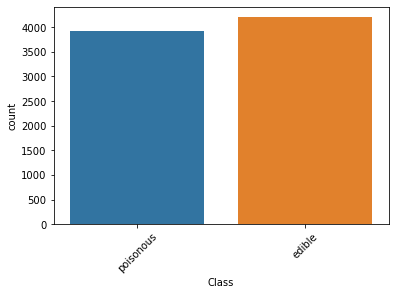

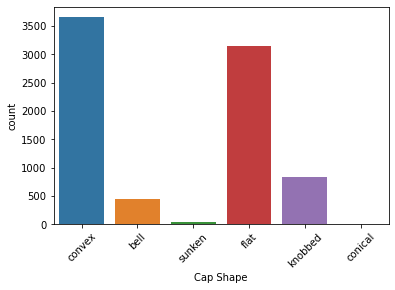

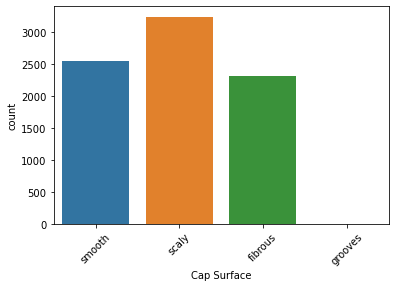

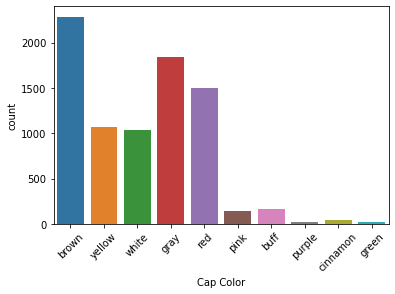

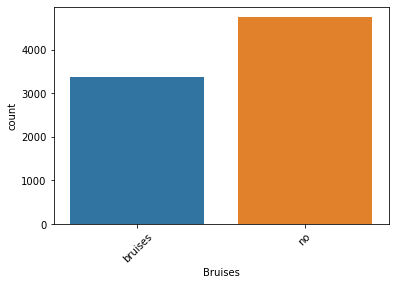

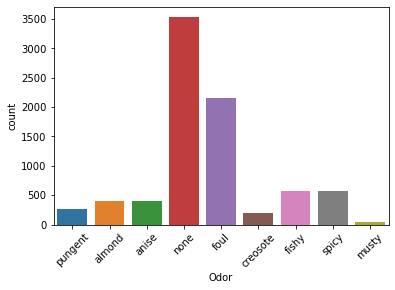

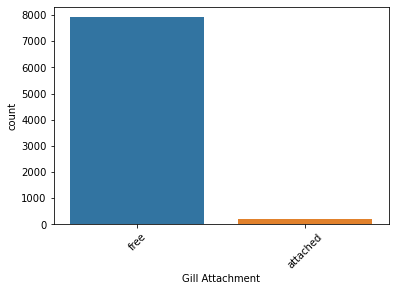

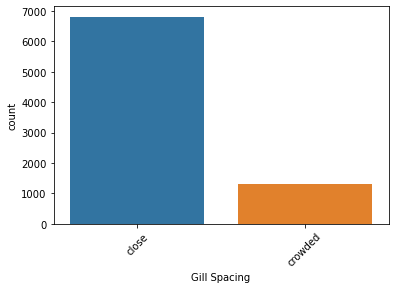

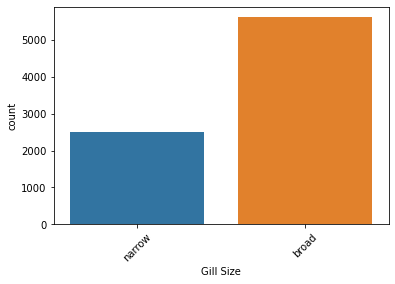

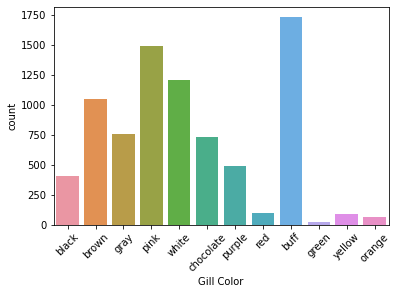

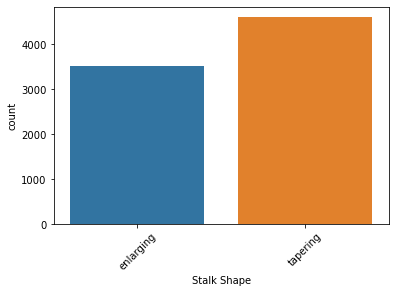

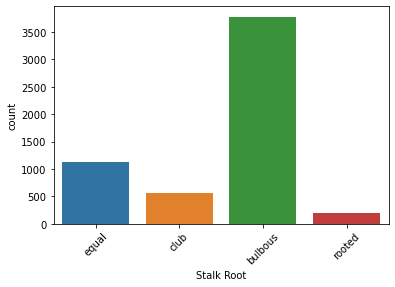

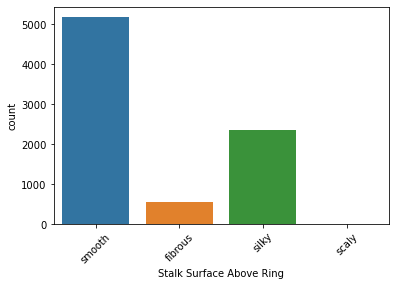

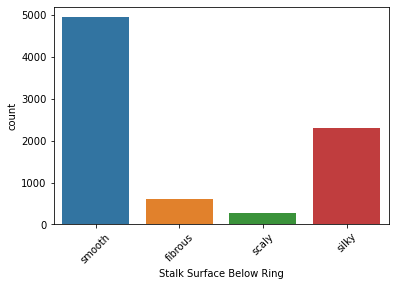

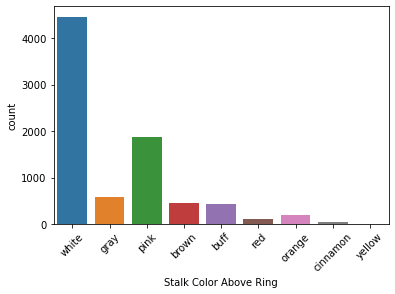

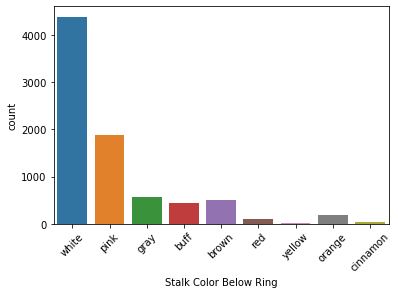

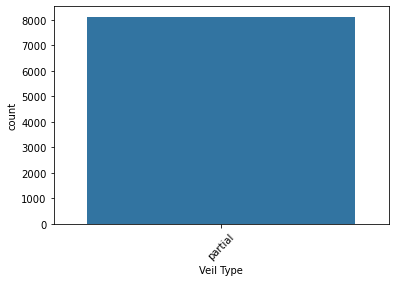

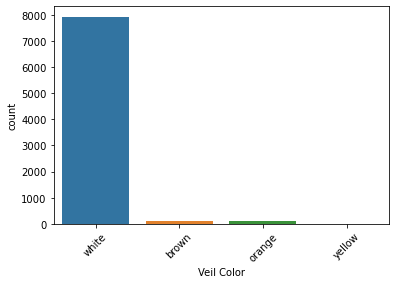

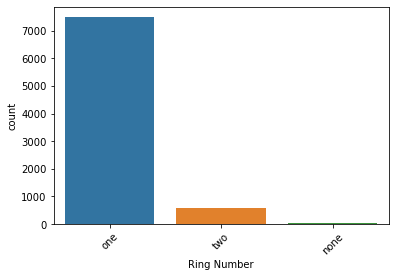

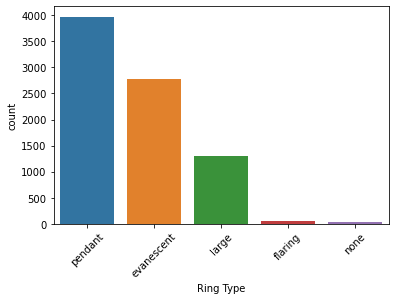

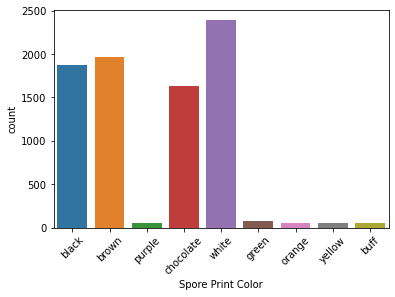

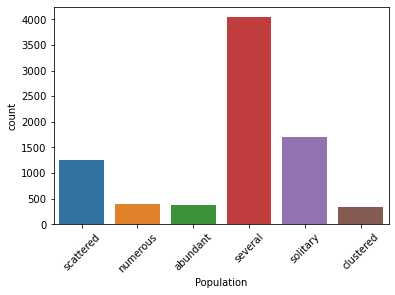

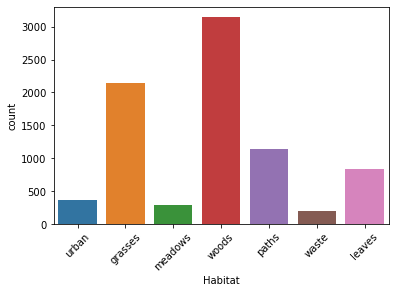

In [13]:
for col in mushies.columns:
    ax = plt.subplot()
    sns.countplot(data = mushies, x = col)
    plt.xticks(rotation = 45)
    ax.set_xlabel(col.replace('_', ' ').title())
    plt.show()

In [ ]:
# lots of flat and convex caps
# almost none with grooves on cap surface
# brown, gray, red, yellow and white are most common cap colours
# lots with no odor, some with foul
# gills are almost always free and closely spaced
# buff, pink, white, brown, gray, chocolate, purple, black most common gill colours
# stalk roots mostly bulbous
# stalk surface above ring mostly smooth otherwise silky (hardly scaly)
# stalk surface below ring smooth or sily (hardly fibrous or scaly)
# stalk colour above or below ring white or pink
# veil type always partial and almost always white
# usually one ring
# rings usually pendant, evanescent or large
# spore print colour is white, brown, black or chocolate
# population is several, scattered or solitary
# most are in woods or grasses

In [14]:
mushies.drop(columns = 'veil_type', axis = 1, inplace = True)

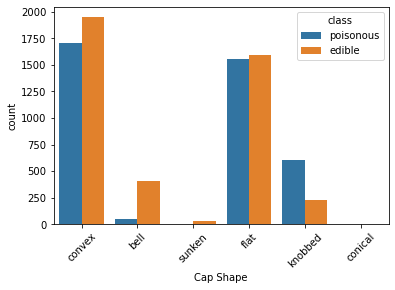

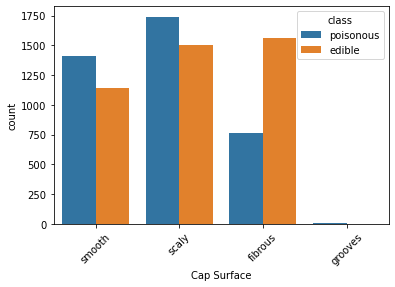

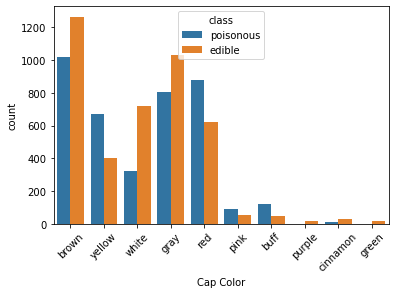

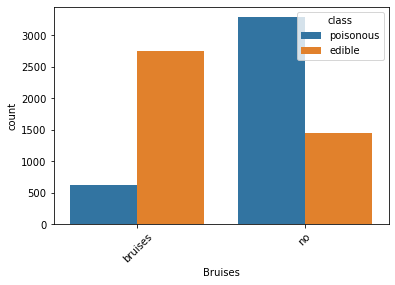

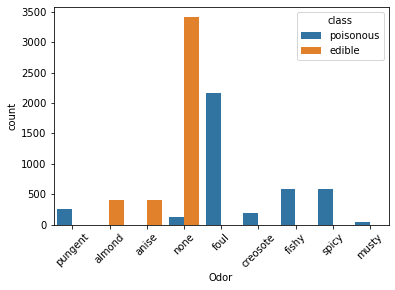

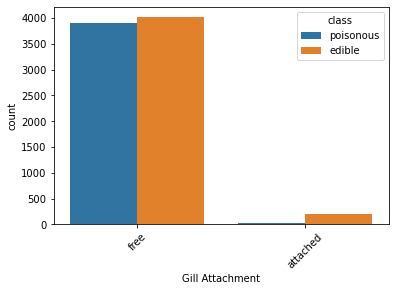

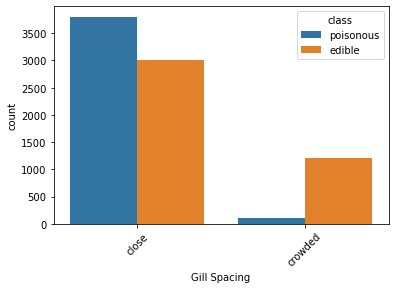

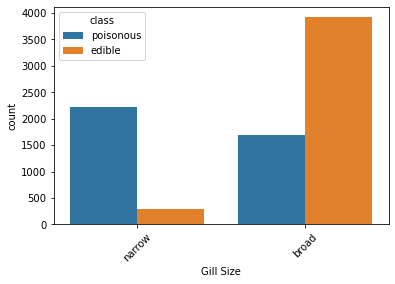

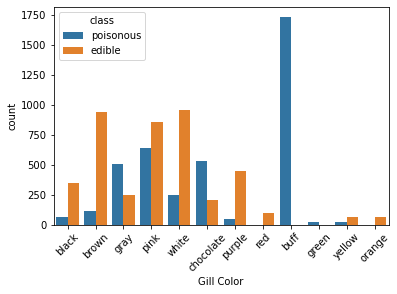

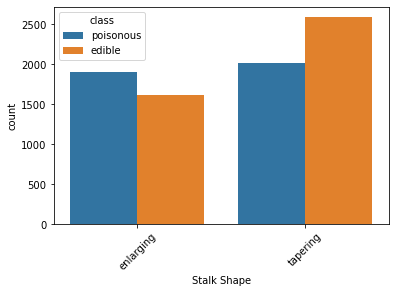

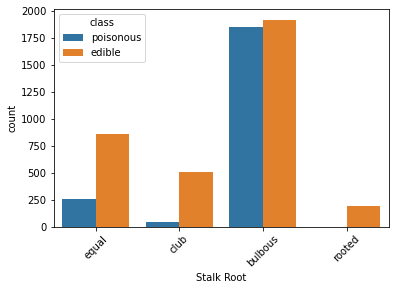

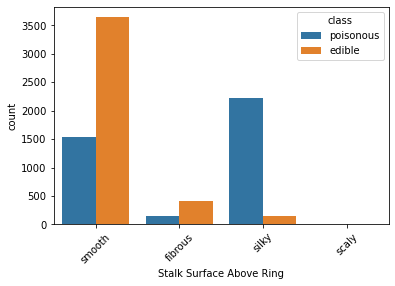

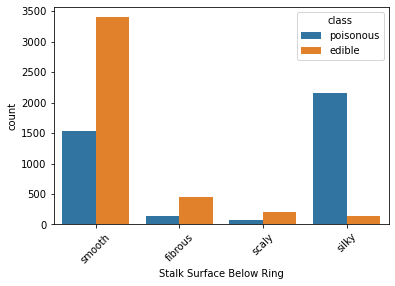

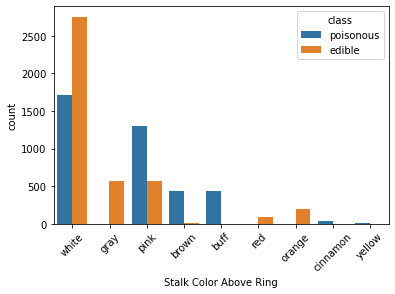

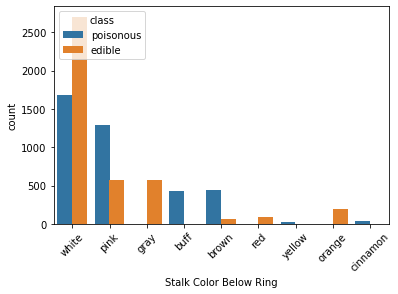

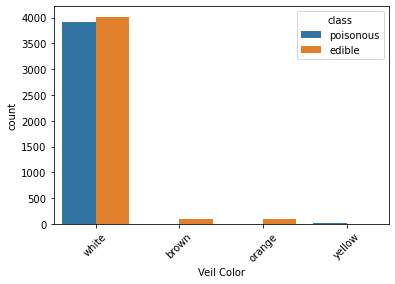

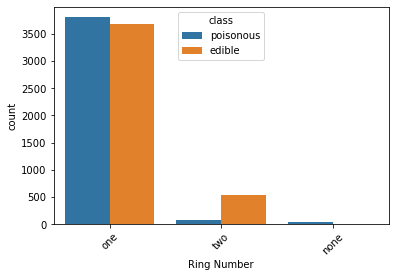

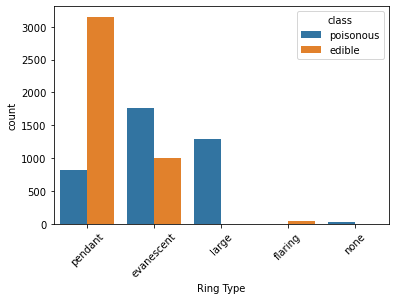

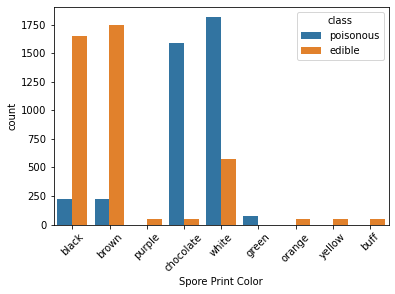

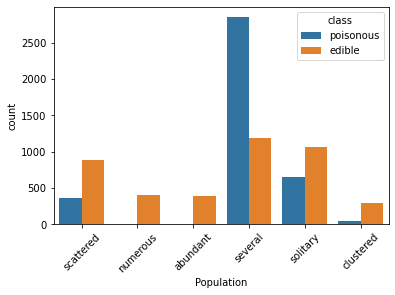

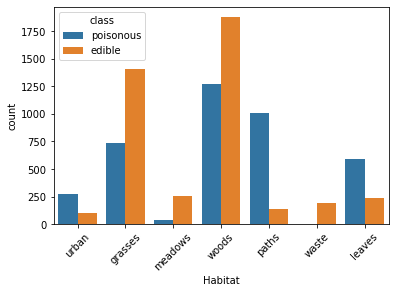

In [15]:
hued_countplots(colour_by = 'class')

In [20]:
## SUPERVISED DATASET
mushies_supervised = mushies.drop(columns = 'stalk_root', axis = 1)
mushies_supervised.to_csv('../Results/mushies_supervised.csv')

In [21]:
## UNSUPERVISED DATASET
mushies.to_csv('../Results/mushies_unsupervised.csv')